🔹 Custom Kernel Accuracy: 0.9000
🔹 Polynomial Kernel Accuracy: 0.4333
🔹 RBF Kernel Accuracy: 1.0000


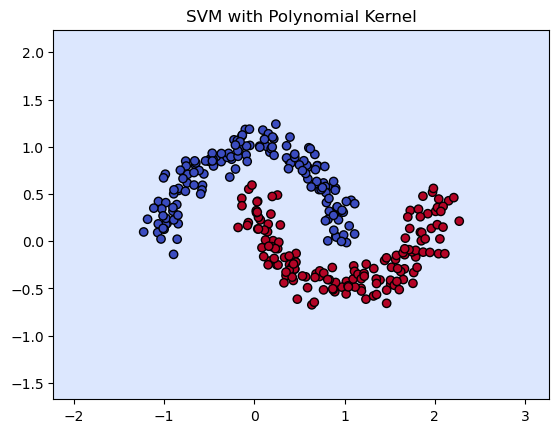

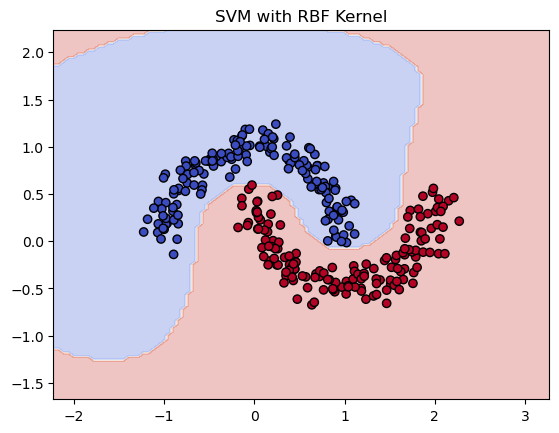

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def custom_poly_kernel(X1, X2, degree=2):
    return (X1 @ X2.T + 1) ** degree 
K_train = custom_poly_kernel(X_train, X_train)
K_test = custom_poly_kernel(X_test, X_train)

svm_custom = SVC(kernel="precomputed")
svm_custom.fit(K_train, y_train)
y_pred_custom = svm_custom.predict(K_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)

svm_poly = SVC(kernel="poly", degree=2)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"🔹 Custom Kernel Accuracy: {accuracy_custom:.4f}")
print(f"🔹 Polynomial Kernel Accuracy: {accuracy_poly:.4f}")
print(f"🔹 RBF Kernel Accuracy: {accuracy_rbf:.4f}")

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_poly, X, y, "SVM with Polynomial Kernel")
plot_decision_boundary(svm_rbf, X, y, "SVM with RBF Kernel")
